In [1]:
import pandas as pd
import seaborn as sns

In [2]:
eco_rounds = pd.read_csv("../data/vct_2021/matches/eco_rounds.csv")
#Convert Loadout Value and Remaining creds to integers
cols_to_conv = ['Loadout Value','Remaining Credits']

def convert_to_int(df):
    df_new = df.copy()
    for col in cols_to_conv:    
        df_new[col] = df_new[col].str.replace('k','').astype('float')*1000
    return df_new

eco2 = convert_to_int(eco_rounds)

In [8]:
len(eco2)

360734

In [5]:
match_game_ids = pd.read_csv('../data/all_vct/all_matches_games_ids.csv')

In [6]:
match_game_ids

Tournament  Tournament ID        Stage  \
0                     Valorant Champions 2021            449  Group Stage   
1                     Valorant Champions 2021            449  Group Stage   
2                     Valorant Champions 2021            449  Group Stage   
3                     Valorant Champions 2021            449  Group Stage   
4                     Valorant Champions 2021            449  Group Stage   
...                                       ...            ...          ...   
23873  Champions Tour 2023: Lock-In Sao Paulo           1188     Playoffs   
23874  Champions Tour 2023: Lock-In Sao Paulo           1188     Playoffs   
23875  Champions Tour 2023: Lock-In Sao Paulo           1188     Playoffs   
23876  Champions Tour 2023: Lock-In Sao Paulo           1188     Playoffs   
23877  Champions Tour 2023: Lock-In Sao Paulo           1188     Playoffs   

       Stage ID   Match Type  Match Type ID                     Match Name  \
0           945  Opening (D)         8272.0  Vision Strikers vs FULL SENSE   
1           945  Opening (D)         8272.0  Vision Strikers vs FULL SENSE   
2           945  Opening (C)         8268.0  Team Vikings vs Crazy Raccoon   
3           945  Opening (C)         8268.0  Team Vikings vs Crazy Raccoon   
4           945  Opening (D)         8272.0               FNATIC vs Cloud9   
...         ...          ...            ...                            ...   
23873      2756  Grand Final        16339.0                 LOUD vs FNATIC   
23874      2756  Grand Final        16339.0                 LOUD vs FNATIC   
23875      2756  Grand Final        16339.0                 LOUD vs FNATIC   
23876      2756  Grand Final        16339.0                 LOUD vs FNATIC   
23877      2756  Grand Final        16339.0                 LOUD vs FNATIC   

       Match ID       Map  Game ID  Year  
0         51282     Haven    57948  2021  
1         51282    Breeze    57949  2021  
2         51278    Icebox    57936  2021  
3         51278     Haven    57937  2021  
4         51283    Icebox    57951  2021  
...         ...       ...      ...   ...  
23873    167393    Ascent   113134  2023  
23874    167393  Fracture   113135  2023  
23875    167393     Split   113136  2023  
23876    167393     Lotus   113137  2023  
23877    167393    Icebox   113138  2023  

[23878 rows x 11 columns]

In [9]:
combined =pd.merge(match_game_ids, eco2)

In [12]:
combined

Tournament  Tournament ID  \
0                                 Valorant Champions 2021            449   
1                                 Valorant Champions 2021            449   
2                                 Valorant Champions 2021            449   
3                                 Valorant Champions 2021            449   
4                                 Valorant Champions 2021            449   
...                                                   ...            ...   
331599  Champions Tour Malaysia & Singapore Stage 1: C...            277   
331600  Champions Tour Malaysia & Singapore Stage 1: C...            277   
331601  Champions Tour Malaysia & Singapore Stage 1: C...            277   
331602  Champions Tour Malaysia & Singapore Stage 1: C...            277   
331603  Champions Tour Malaysia & Singapore Stage 1: C...            277   

              Stage  Stage ID   Match Type  Match Type ID  \
0       Group Stage       945  Opening (D)         8272.0   
1       Group Stage       945  Opening (D)         8272.0   
2       Group Stage       945  Opening (D)         8272.0   
3       Group Stage       945  Opening (D)         8272.0   
4       Group Stage       945  Opening (D)         8272.0   
...             ...       ...          ...            ...   
331599    Qualifier       554  Round of 16         2716.0   
331600    Qualifier       554  Round of 16         2716.0   
331601    Qualifier       554  Round of 16         2716.0   
331602    Qualifier       554  Round of 16         2716.0   
331603    Qualifier       554  Round of 16         2716.0   

                           Match Name  Match ID    Map  Game ID  Year  \
0       Vision Strikers vs FULL SENSE     51282  Haven    57948  2021   
1       Vision Strikers vs FULL SENSE     51282  Haven    57948  2021   
2       Vision Strikers vs FULL SENSE     51282  Haven    57948  2021   
3       Vision Strikers vs FULL SENSE     51282  Haven    57948  2021   
4       Vision Strikers vs FULL SENSE     51282  Haven    57948  2021   
...                               ...       ...    ...      ...   ...   
331599      Reality Rift vs Paper Rex      9398   Bind    16034  2021   
331600      Reality Rift vs Paper Rex      9398   Bind    16034  2021   
331601      Reality Rift vs Paper Rex      9398   Bind    16034  2021   
331602      Reality Rift vs Paper Rex      9398   Bind    16034  2021   
331603      Reality Rift vs Paper Rex      9398   Bind    16034  2021   

        Round Number             Team  Loadout Value  Remaining Credits  \
0                  1  Vision Strikers         3900.0              400.0   
1                  1       FULL SENSE         3400.0              200.0   
2                  2  Vision Strikers        14400.0             5200.0   
3                  2       FULL SENSE         2400.0             8400.0   
4                  3  Vision Strikers        17600.0            15200.0   
...              ...              ...            ...                ...   
331599            22        Paper Rex         6200.0            11200.0   
331600            23     Reality Rift        23100.0            19800.0   
331601            23        Paper Rex        21300.0             4000.0   
331602            24     Reality Rift        22700.0             9400.0   
331603            24        Paper Rex        22200.0             4700.0   

                    Type Outcome  
0              Eco: 0-5k     Win  
1              Eco: 0-5k    Loss  
2       Semi-buy: 10-20k     Win  
3              Eco: 0-5k    Loss  
4       Semi-buy: 10-20k    Loss  
...                  ...     ...  
331599   Semi-eco: 5-10k    Loss  
331600    Full buy: 20k+    Loss  
331601    Full buy: 20k+     Win  
331602    Full buy: 20k+     Win  
331603    Full buy: 20k+    Loss  

[331604 rows x 17 columns]

In [37]:
round2 = combined[combined['Round Number'].isin([2,14])]

In [85]:
grouped = combined.groupby('Game ID')

In [49]:
j=grouped['Round Number'].max()

In [56]:
h=j[j>=16].index

In [60]:
round2.shape

(32522, 17)

In [66]:
round2a = round2[round2['Game ID'].isin(h)]


In [93]:
round2a['Total Value'] = round2a['Loadout Value'] + round2a['Remaining Credits']
round2a_adv = round2a[round2a['Total Value'] >= 16000]
round2a_disadv = round2a[(round2a['Total Value'] <= 12000) & round2a['Total Value']>= 9500]

C:\Users\swamp\AppData\Local\Temp\ipykernel_15012\15250703.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  round2a['Total Value'] = round2a['Loadout Value'] + round2a['Remaining Credits']


In [87]:
grouped2 = combined.groupby(['Team','Game ID'])

In [92]:
for a,b,c in round2a_adv[['Team', 'Game ID','Round Number']].values:
    d = grouped2.get_group((a,b))
    print(d['Round Number'])

0      1
2      2
4      3
6      4
8      5
10     6
12     7
14     8
16     9
18    10
20    11
22    12
24    13
26    14
28    15
30    16
32    17
34    18
Name: Round Number, dtype: int64
0      1
2      2
4      3
6      4
8      5
10     6
12     7
14     8
16     9
18    10
20    11
22    12
24    13
26    14
28    15
30    16
32    17
34    18
Name: Round Number, dtype: int64
36     1
38     2
40     3
42     4
44     5
46     6
48     7
50     8
52     9
54    10
56    11
58    12
60    13
62    14
64    15
66    16
68    17
70    18
Name: Round Number, dtype: int64
37     1
39     2
41     3
43     4
45     5
47     6
49     7
51     8
53     9
55    10
57    11
59    12
61    13
63    14
65    15
67    16
69    17
71    18
Name: Round Number, dtype: int64
72      1
74      2
76      3
78      4
80      5
82      6
84      7
86      8
88      9
90     10
92     11
94     12
96     13
98     14
100    15
102    16
104    17
106    18
108    19
110    20
112    21
114    22


In [4]:
eco_pistol = eco2[eco2['Round Number'].isin([1,13])]

In [5]:
pistol_win = eco_pistol[eco_pistol['Outcome']=='Win']

In [6]:
pistol_win.head()

Tournament        Stage   Match Type  \
0   Valorant Champions 2021  Group Stage  Opening (D)   
24  Valorant Champions 2021  Group Stage  Opening (D)   
36  Valorant Champions 2021  Group Stage  Opening (D)   
61  Valorant Champions 2021  Group Stage  Opening (D)   
72  Valorant Champions 2021  Group Stage  Opening (C)   

                       Match Name     Map  Round Number             Team  \
0   Vision Strikers vs FULL SENSE   Haven             1  Vision Strikers   
24  Vision Strikers vs FULL SENSE   Haven            13  Vision Strikers   
36  Vision Strikers vs FULL SENSE  Breeze             1  Vision Strikers   
61  Vision Strikers vs FULL SENSE  Breeze            13       FULL SENSE   
72  Team Vikings vs Crazy Raccoon  Icebox             1     Team Vikings   

    Loadout Value  Remaining Credits       Type Outcome  
0          3900.0              400.0  Eco: 0-5k     Win  
24         3700.0              400.0  Eco: 0-5k     Win  
36         3600.0              500.0  Eco: 0-5k     Win  
61         3900.0              200.0  Eco: 0-5k     Win  
72         4000.0              300.0  Eco: 0-5k     Win

In [13]:
pistol_win.index

Index([     0,     24,     36,     61,     72,     97,    116,    140,    159,
          183,
       ...
       360531, 360555, 360566, 360591, 360609, 360632, 360651, 360675, 360687,
       360711],
      dtype='int64', length=17861)

In [38]:
win_round2=eco2.iloc[pistol_win.index+2]

In [67]:
win_round2a=eco2[((eco2['Loadout Value'] + eco2['Remaining Credits']) >= 15000)& (eco2['Round Number'].isin([2,14]))] 

In [69]:
win_round2a['Total Value'] = win_round2a['Loadout Value'] + win_round2a['Remaining Credits']

C:\Users\swamp\AppData\Local\Temp\ipykernel_21912\2937555086.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  win_round2a['Total Value'] = win_round2a['Loadout Value'] + win_round2a['Remaining Credits']


In [75]:
win_round2b = win_round2a[win_round2a['Total Value'] <= 16000]

<Axes: >

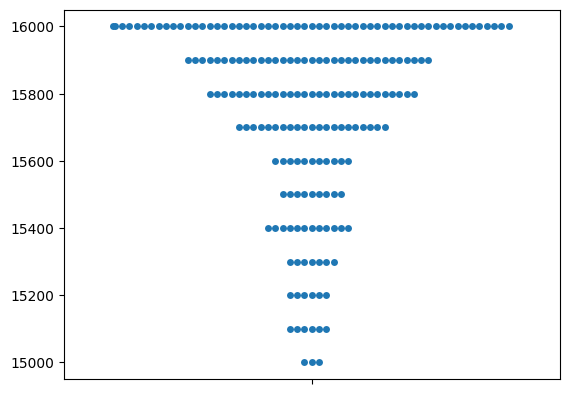

In [79]:
sns.swarmplot(win_round2b['Total Value'].values)

In [88]:
win_round2b[win_round2b['Total Value']==16000]

Tournament  \
208                               Valorant Champions 2021   
12477     Valorant Champions Tour Stage 3: Masters Berlin   
19986                    Valorant Conquerors Championship   
24214                    Valorant Conquerors Championship   
30287    Champions Tour SEA Stage 3: Challengers Playoffs   
39571                              Oceania Tour: Stage 03   
46967           Champions Tour Korea Stage 3: Challengers   
51339   Champions Tour Japan Stage 3: Challengers Play...   
53261        Champions Tour Brazil Stage 3: Challengers 3   
56406     Champions Tour Indonesia Stage 3: Challengers 3   
76308   Champions Tour North America Stage 3: Challeng...   
80463   Champions Tour North America Stage 3: Challeng...   
82804   Champions Tour North America Stage 3: Challeng...   
82861   Champions Tour North America Stage 3: Challeng...   
92544        Champions Tour Europe Stage 3: Challengers 2   
106337       Champions Tour Europe Stage 3: Challengers 2   
110656       Champions Tour Turkey Stage 3: Challengers 2   
113091       Champions Tour Turkey Stage 3: Challengers 2   
122655          Champions Tour CIS Stage 3: Challengers 2   
137897        Champions Tour Japan Stage 3: Challengers 2   
142381        Champions Tour LATAM Stage 3: Challengers 1   
142859        Champions Tour LATAM Stage 3: Challengers 1   
143631        Champions Tour LATAM Stage 3: Challengers 1   
144184        Champions Tour LATAM Stage 3: Challengers 1   
150986  Champions Tour North America Stage 3: Challeng...   
166479       Champions Tour Europe Stage 3: Challengers 1   
168197       Champions Tour Europe Stage 3: Challengers 1   
182851    Champions Tour Indonesia Stage 3: Challengers 1   
182892    Champions Tour Indonesia Stage 3: Challengers 1   
184705    Champions Tour Indonesia Stage 3: Challengers 1   
184974    Champions Tour Indonesia Stage 3: Challengers 1   
213823       Champions Tour Turkey Stage 3: Challengers 1   
216932          Champions Tour CIS Stage 3: Challengers 1   
223298                             Oceania Tour: Stage 02   
226752                             Oceania Tour: Stage 02   
229447                             Oceania Tour: Stage 02   
232248                     Strike Arabia League: Season 1   
235680                     Strike Arabia League: Season 1   
242213  Champions Tour North America Stage 2: Challeng...   
243553  Champions Tour Stage 2: EMEA Challengers Playoffs   
244079     Champions Tour SEA Stage 2: Challengers Finals   
261524  Champions Tour North America Stage 2: Challeng...   
269182  Champions Tour North America Stage 2: Challeng...   
272982        Champions Tour LATAM Stage 2: Challengers 2   
277142     Champions Tour Thailand Stage 2: Challengers 2   
277538     Champions Tour Thailand Stage 2: Challengers 2   
279648  Champions Tour Hong Kong & Taiwan Stage 2: Cha...   
281323        Champions Tour Japan Stage 2: Challengers 2   
303013       Champions Tour Europe Stage 2: Challengers 2   
304893       Champions Tour Europe Stage 2: Challengers 2   
312501       Champions Tour Turkey Stage 2: Challengers 2   
318064  Champions Tour Philippines Stage 2: Challengers 2   
327682  Champions Tour North America Stage 2: Challeng...   
332494  Champions Tour North America Stage 2: Challeng...   
335849        Champions Tour LATAM Stage 2: Challengers 1   
358787          Champions Tour CIS Stage 2: Challengers 2   

                                        Stage                   Match Type  \
208                               Group Stage                  Opening (D)   
12477                             Group Stage                  Decider (C)   
19986   Pakistan and Afghanistan Qualifier #1                  Grand Final   
24214                      India Qualifier #2                  Grand Final   
30287                                Playoffs                 Grand Finals   
39571                       Open Qualifier #1        7th-8th Decider Match   
46967                  

In [91]:
eco2.iloc[209]

Tournament           Valorant Champions 2021
Stage                            Group Stage
Match Type                       Opening (D)
Match Name                  FNATIC vs Cloud9
Map                                    Split
Round Number                               2
Team                                  Cloud9
Loadout Value                        12100.0
Remaining Credits                      400.0
Type                        Semi-buy: 10-20k
Outcome                                 Loss
Name: 209, dtype: object

In [47]:
w2_teams = win_round2.Team.reset_index(drop=True)

In [49]:
w2_teams

0        Vision Strikers
1        Vision Strikers
2        Vision Strikers
3             FULL SENSE
4           Team Vikings
              ...       
17856       Reality Rift
17857          Paper Rex
17858          Paper Rex
17859          Paper Rex
17860          Paper Rex
Name: Team, Length: 17861, dtype: object

In [50]:
p2_teams = pistol_win.Team.reset_index(drop=True)

In [51]:
p2_teams

0        Vision Strikers
1        Vision Strikers
2        Vision Strikers
3             FULL SENSE
4           Team Vikings
              ...       
17856       Reality Rift
17857          Paper Rex
17858          Paper Rex
17859          Paper Rex
17860          Paper Rex
Name: Team, Length: 17861, dtype: object

In [58]:
(p2_teams == w2_teams).describe() 

count     17861
unique        2
top        True
freq      17780
Name: Team, dtype: object

In [56]:
win_round2

Tournament        Stage  \
2                                 Valorant Champions 2021  Group Stage   
26                                Valorant Champions 2021  Group Stage   
38                                Valorant Champions 2021  Group Stage   
63                                Valorant Champions 2021  Group Stage   
74                                Valorant Champions 2021  Group Stage   
...                                                   ...          ...   
360634  Champions Tour Malaysia & Singapore Stage 1: C...    Qualifier   
360653  Champions Tour Malaysia & Singapore Stage 1: C...    Qualifier   
360677  Champions Tour Malaysia & Singapore Stage 1: C...    Qualifier   
360689  Champions Tour Malaysia & Singapore Stage 1: C...    Qualifier   
360713  Champions Tour Malaysia & Singapore Stage 1: C...    Qualifier   

         Match Type                     Match Name     Map  Round Number  \
2       Opening (D)  Vision Strikers vs FULL SENSE   Haven             2   
26      Opening (D)  Vision Strikers vs FULL SENSE   Haven            14   
38      Opening (D)  Vision Strikers vs FULL SENSE  Breeze             2   
63      Opening (D)  Vision Strikers vs FULL SENSE  Breeze            14   
74      Opening (C)  Team Vikings vs Crazy Raccoon  Icebox             2   
...             ...                            ...     ...           ...   
360634  Round of 16      Reality Rift vs Paper Rex  Ascent            14   
360653  Round of 16      Reality Rift vs Paper Rex   Haven             2   
360677  Round of 16      Reality Rift vs Paper Rex   Haven            14   
360689  Round of 16      Reality Rift vs Paper Rex    Bind             2   
360713  Round of 16      Reality Rift vs Paper Rex    Bind            14   

                   Team  Loadout Value  Remaining Credits              Type  \
2       Vision Strikers        14400.0             5200.0  Semi-buy: 10-20k   
26      Vision Strikers        14000.0             4200.0  Semi-buy: 10-20k   
38      Vision Strikers        14000.0             5500.0  Semi-buy: 10-20k   
63           FULL SENSE        14000.0             5300.0  Semi-buy: 10-20k   
74         Team Vikings        16200.0             3800.0  Semi-buy: 10-20k   
...                 ...            ...                ...               ...   
360634     Reality Rift        13300.0             3500.0  Semi-buy: 10-20k   
360653        Paper Rex        12500.0             6700.0  Semi-buy: 10-20k   
360677        Paper Rex        14100.0             4000.0  Semi-buy: 10-20k   
360689        Paper Rex        11800.0             7700.0  Semi-buy: 10-20k   
360713        Paper Rex        14500.0             3400.0  Semi-buy: 10-20k   

       Outcome  
2          Win  
26        Loss  
38         Win  
63         Win  
74         Win  
...        ...  
360634     Win  
360653     Win  
360677     Win  
360689     Win  
360713     Win  

[17861 rows x 11 columns]

In [21]:
j=win_round2[win_round2['Loadout Value'] < 10000]

In [52]:
j.head(10)

Tournament  \
370                              Valorant Champions 2021   
4509   Champions Tour North America: Last Chance Qual...   
6320          Champions Tour EMEA: Last Chance Qualifier   
7796   Champions Tour Asia-Pacific: Last Chance Quali...   
8095   Champions Tour Asia-Pacific: Last Chance Quali...   
10337                 Strike Arabia Championship: Finals   
13128    Valorant Champions Tour Stage 3: Masters Berlin   
15808                     Strike Arabia League: Season 3   
20870                   Valorant Conquerors Championship   
29972   Champions Tour SEA Stage 3: Challengers Playoffs   

                                  Stage                Match Type  \
370                         Group Stage               Opening (C)   
4509                         Main Event               Grand Final   
6320                         Main Event       Upper Quarterfinals   
7796                         Main Event     Lower Bracket Round 1   
8095                         Main Event  Upper Bracket Semifinals   
10337                        Main Event      Lower Bracket Finals   
13128                          Playoffs                Semifinals   
15808           Levant and North Africa               Group Stage   
20870  Sri Lanka and Maldives Qualifier             Quarterfinals   
29972                          Playoffs     Lower Bracket Round 2   

                             Match Name     Map  Round Number            Team  \
370       Gambit Esports vs Team Secret    Bind             1  Gambit Esports   
4509                     Rise vs Cloud9    Bind             1          Cloud9   
6320   Team Liquid vs One Breath Gaming   Haven             1     Team Liquid   
7796            REJECT vs DAMWON Gaming    Bind             1          REJECT   
8095           Paper Rex vs NORTHEPTION  Icebox             1     NORTHEPTION   
10337  Piercer Esports vs Anubis Gaming  Breeze             1   Anubis Gaming   
13128               100 Thieves vs Envy   Haven             1     100 Thieves   
15808          Anubis Gaming vs Exality    Bind             1   Anubis Gaming   
20870     Lexious Gaming vs Run and Gun   Haven             1  Lexious Gaming   
29972        Team Big BAAM vs Alter Ego  Ascent             2   Team Big BAAM   

       Loadout Value  Remaining Credits       Type Outcome  
370           3900.0              200.0  Eco: 0-5k    Loss  
4509          3300.0              600.0  Eco: 0-5k    Loss  
6320          3500.0              100.0  Eco: 0-5k     Win  
7796          4000.0              200.0  Eco: 0-5k    Loss  
8095          4100.0              100.0  Eco: 0-5k    Loss  
10337         3500.0              200.0  Eco: 0-5k    Loss  
13128         3100.0              700.0  Eco: 0-5k     Win  
15808         4100.0              400.0  Eco: 0-5k     Win  
20870         3300.0              200.0  Eco: 0-5k     Win  
29972         1300.0             8800.0  Eco: 0-5k     Win

In [61]:
k=j[j['Round Number']>1]
k2=j[j['Round Number']==1]

In [63]:
k2.describe()

Round Number  Loadout Value  Remaining Credits
count         158.0     158.000000         158.000000
mean            1.0    3723.417722         250.000000
std             0.0     294.139731         151.741483
min             1.0    3000.000000           0.000000
25%             1.0    3500.000000         200.000000
50%             1.0    3800.000000         200.000000
75%             1.0    3900.000000         300.000000
max             1.0    4300.000000         900.000000

In [55]:
k[k['Round Number'] > 3]

Tournament              Stage  \
32686   Champions Tour Stage 3: EMEA Challengers Playoffs         Main Event   
32777   Champions Tour Stage 3: EMEA Challengers Playoffs         Main Event   
40701                              Oceania Tour: Stage 03  Open Qualifier #2   
92374        Champions Tour Europe Stage 3: Challengers 2     Open Qualifier   
92426        Champions Tour Europe Stage 3: Challengers 2     Open Qualifier   
108306       Champions Tour Turkey Stage 3: Challengers 2     Open Qualifier   
159458       Champions Tour Europe Stage 3: Challengers 1     Open Qualifier   
159548       Champions Tour Europe Stage 3: Challengers 1     Open Qualifier   
164915       Champions Tour Europe Stage 3: Challengers 1     Open Qualifier   
167799       Champions Tour Europe Stage 3: Challengers 1     Open Qualifier   
196900  Champions Tour Philippines Stage 3: Challengers 1         Main Event   
217144          Champions Tour CIS Stage 3: Challengers 1     Open Qualifier   
233522                     Strike Arabia League: Season 1       GCC and Iraq   
246542          Champions Tour Korea Stage 2: Challengers  Preliminary Round   
248712          Champions Tour Korea Stage 2: Challengers        Group Stage   
262093  Champions Tour North America Stage 2: Challeng...     Open Qualifier   

                 Match Type                              Match Name     Map  \
32686   Upper Quarterfinals            G2 Esports vs Oxygen Esports  Breeze   
32777   Upper Quarterfinals  Papara SuperMassive vs FunPlus Phoenix   Split   
40701           Round of 16                          McTeam vs aaaa  Ascent   
92374          Round of 128               Stramme Mangos vs UBITEAM  Ascent   
92426          Round of 128               Stramme Mangos vs UBITEAM   Haven   
108306          Round of 64       Anatolia Esports vs Team Evo Seek    Bind   
159458         Round of 256                     Voltex vs Kupalboys  Ascent   
159548         Round of 256                     Voltex vs Kupalboys   Split   
164915         Round of 256                     15 Kings vs NEBULAA   Haven   
167799         Round of 128              WLGaming Esports vs Voltex   Haven   
196900           Semifinals            Galaxy Racer vs Zeal Esports  Icebox   
217144          Round of 64                     ZOTIX vs TEAM SPACE    Bind   
233522              Round 1               YaLLa Esports vs Fraggerz    Bind   
246542              Group B              NUTURN vs Our Finale Story   Split   
248712          Opening (B)               DAMWON Gaming vs Food Eat  Ascent   
262093         Round of 128              Gen.G vs Chilling in Space   Haven   

        Round Number               Team  Loadout Value  Remaining Credits  \
32686             14         G2 Esports            0.0                0.0   
32777             14    FunPlus Phoenix            0.0                0.0   
40701             14               aaaa            0.0                0.0   
92374             14     Stramme Mangos         9200.0             9600.0   
92426             14     Stramme Mangos         9900.0             9300.0   
108306            14   Anatolia Esports            0.0                0.0   
159458            14             Voltex         6800.0            10900.0   
159548            14             Voltex         8100.0             9100.0   
164915            14            NEBULAA            0.0                0.0   
167799            14             Voltex         5700.0            11700.0   
196900            14       Galaxy Racer            0.0                0.0   
217144            14              ZOTIX         9300.0            11300.0   
233522            14      YaLLa Esports         9300.0             9200.0   
246542            14             NUTURN         9300.0             9900.0   
248712            14      DAMWON Gaming         9600.0             9600.0   
262093            14  Chilling in Space         8800.0             9900.0   

                   Type Outcome 

In [33]:
eco2.iloc[29973]

Tournament           Champions Tour SEA Stage 3: Challengers Playoffs
Stage                                                        Playoffs
Match Type                                      Lower Bracket Round 2
Match Name                                 Team Big BAAM vs Alter Ego
Map                                                            Ascent
Round Number                                                        2
Team                                                        Alter Ego
Loadout Value                                                 15100.0
Remaining Credits                                              3400.0
Type                                                 Semi-buy: 10-20k
Outcome                                                          Loss
Name: 29973, dtype: object